# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [73]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import seaborn as sns

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [5]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

In [91]:
male_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [92]:
female_df.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


In [10]:
print('The mean height for males and females is: ', data['Height'].mean(), '.')

The mean height for males and females is:  66.36755975482124 .


In [14]:
print('The mean weight for males and females is: ', data['Weight'].mean(), '.')

The mean weight for males and females is:  161.44035683283076 .


In [22]:
print('The standard deviation of male and female heights is: ', data['Height'].std(), '.')

The standard deviation of male and female heights is:  3.847528120773229 .


In [21]:
print('The standard deviation of male and female weights is: ', data['Weight'].std(), '.')

The standard deviation of male and female weights is:  32.108439006519596 .


In [9]:
print('The mean height for males is: ', male_df['Height'].mean(), '.')

The mean height for males is:  69.02634590621741 .


In [11]:
print('The mean weight for males is: ', male_df['Weight'].mean(), '.')

The mean weight for males is:  187.0206206581932 .


In [17]:
print('The standard deviation of male heights is: ', male_df['Height'].std(), '.')

The standard deviation of male heights is:  2.863362228660647 .


In [18]:
print('The standard deviation of male weights is: ', male_df['Weight'].std(), '.')

The standard deviation of male weights is:  19.7811545167638 .


In [12]:
print('The mean height for females is: ', female_df['Height'].mean(), '.')

The mean height for females is:  63.70877360342507 .


In [13]:
print('The mean weight for females is: ', male_df['Weight'].mean(), '.')

The mean weight for females is:  187.0206206581932 .


In [19]:
print('The standard deviation of female heights is: ', female_df['Height'].std(), '.')

The standard deviation of female heights is:  2.696284015765054 .


In [20]:
print('The standard deviation of female weights is: ', female_df['Weight'].std(), '.')

The standard deviation of female weights is:  19.022467805319028 .


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

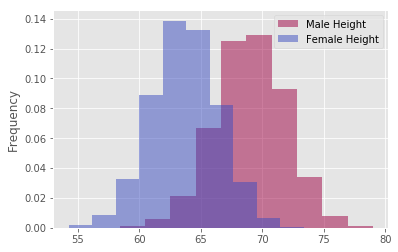

In [43]:
male_df['Height'].plot(kind='hist', density=True, legend=True, label='Male Height', alpha=0.5, colormap='Spectral')
female_df['Height'].plot(kind='hist', density=True, legend=True, label='Female Height', alpha=0.5, colormap='coolwarm')

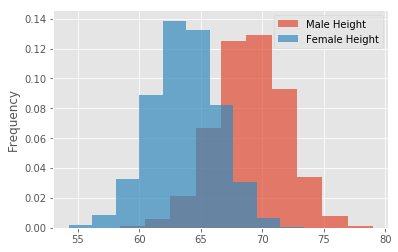

In [ ]:
# Record your observations - are these inline with your personal observations?
# Yes, they are correspond to general ob

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

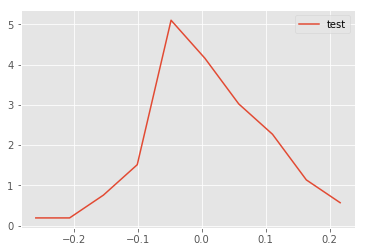

In [54]:
def density(x):
    n, bins = np.histogram(x, bins=10, density=True)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = (bins[k] + bins[k+1])/2
        pdfy[k] = n[k]
    
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

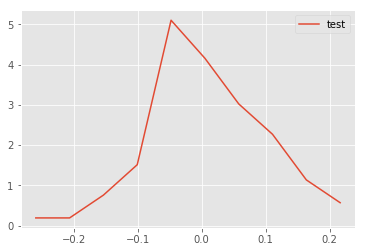

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

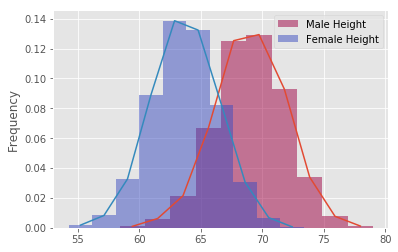

In [64]:
# You code here 
male_df['Height'].plot(kind='hist', density=True, legend=True, label='Male Height', alpha=0.5, colormap='Spectral')
female_df['Height'].plot(kind='hist', density=True, legend=True, label='Female Height', alpha=0.5, colormap='coolwarm')

x, y = density(male_df['Height'])
plt.plot(x, y)
x, y = density(female_df['Height'])
plt.plot(x, y)

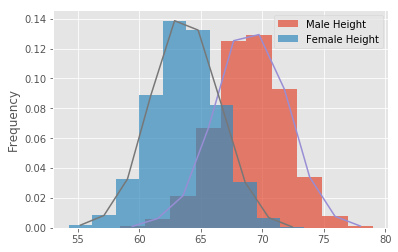

#### Repeat above exerice for male and female weights

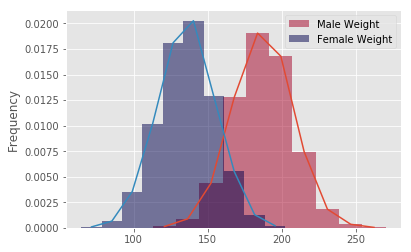

In [72]:
# Your code here 
male_df['Weight'].plot(kind='hist', density=True, legend=True, label='Male Weight', alpha=0.5, colormap='RdYlGn')
female_df['Weight'].plot(kind='hist', density=True, legend=True, label='Female Weight', alpha=0.5, colormap='seismic')

x, y = density(male_df['Weight'])
plt.plot(x, y)
x, y = density(female_df['Weight'])
plt.plot(x, y)

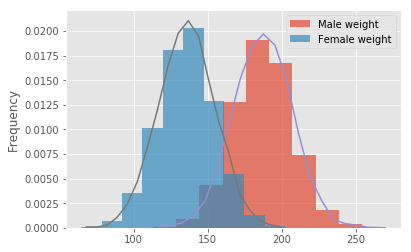

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?
# So whats the takeaway when comparing male and female heights and weights 

# Males tend to be taller and weigh heavier than women.
# These two distributions seem to align with these observations.
# In addition, the overlap corresponds with the observation that there are males and females who have the similar height or weight.

#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


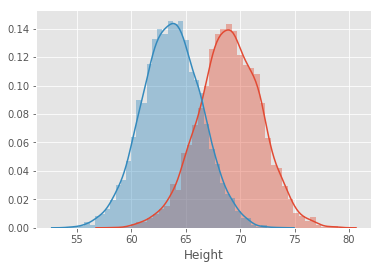

In [87]:
sns.distplot(male_df['Height'], bins=40, hist=True, rug=False)
sns.distplot(female_df['Height'], bins=40, hist=True, rug=False);

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


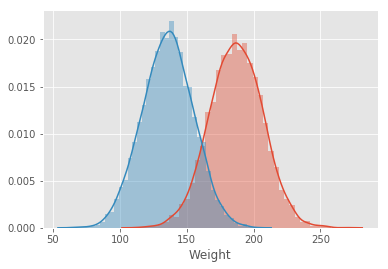

In [90]:
sns.distplot(male_df['Weight'], bins=40, hist=True, rug=False)
sns.distplot(female_df['Weight'], bins=40, hist=True, rug=False)

Text(0.5,1,'Comparing Weights')

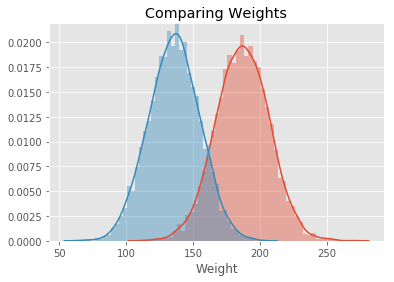

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
# The alignment between the curve and the histogram is closer in the seaborn visualizations compared to the matplotlib visualizations.
# In addition, an additional function needs to be defined to graph using matplotlib compared to seaborn, which has a function built-in.

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.